<a href="https://colab.research.google.com/github/fabrytp8/TareaGuiada/blob/main/TrabajoPractico/Trabajo_Pr%C3%A1ctico_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:  Fabricio Tipantocta <br>
Url: https://github.com/fabrytp8/TareaGuiada/blob/main/TrabajoPractico/Trabajo_Pr%C3%A1ctico_Algoritmos.ipynb<br>
Problema:
>Combinar cifras y operaciones

**Problema 3. Combinar cifras y operaciones**<br>

• El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.<br>
• Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)<br>
• Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:<br>
4+2-6/3*1 = 4<br>

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:<br>
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?<br>
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo ?<br>
• Nota: Es posible usar la función de python “eval” para evaluar una expresión:




                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Sin tener en cuenta las restricciones se deben permutar 5 dígitos de 9 cifras dando un total de 15.120 posibilidades, se toma en cuenta también las permutaciones de los signos de suma, resta, multiplicación y división de 4 son 24 combinaciones, y multiplicándolos da un total de: 15.120 x 24 =362.880<br>

Con el algoritmo propuesto y tomando en cuenta solo los números enteros de cada permutacion de dígitos y permutación de signos, dando un total de 20 respuestas.


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


En este problema manejé arreglos por recursividad para generar todas las combinaciones pertinentes de 5 cifras de las 9 que se tiene.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

La función objetivo son permutaciones, una para los dígitos se escoge varias combinaciones de 5 elementos de un total de 9 y otra para las operaciones un total de 4:<br>
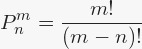
<br>
Se solicita maximizar y minimizar el problema, ya que se epide tanto el máximo valor de alguna combinación, y de igual manera el valor mínimo. 

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [17]:
# solo las permutaciones sin recursividad
x=[1,2,3,4,5,6,7,8,9]
y=[]
cnt=0
for i in x:
  for j in x:
    for k in x:
      for m in x:
        for n in x:
          if i!=j and i!=k and i!=m and i!=n and \
            j!=k and j!=m and j!=n and \
            k!=m and k!=n and m!=n:
            orden = [i,j,k,m,n]
            cnt +=1
            y.append(orden)
            # print('{:3d} :{}'.format(cnt,orden))
print(np.array(y))

[[1 2 3 4 5]
 [1 2 3 4 6]
 [1 2 3 4 7]
 ...
 [9 8 7 6 3]
 [9 8 7 6 4]
 [9 8 7 6 5]]


Calcula la complejidad del algoritmo por fuerza bruta

O(n^5)

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

In [7]:
import numpy as np
# -------------------------------------------------------------------
# -------------------------------------------------------------------
def comp(x):
    z=list(x)
    n=[]
    m=[]
    for i in x:
        if i not in n:
            n.append(i)
        else:
            m.append(i)
    if len(m)==0:
        return True
    else:
        return False

def printK(set,k):
    n = len(set)
    printK1(set,"",n,k)

def printK1(set,perfix,n,k):
    global y 
    if(k==0):
        y.append(perfix)
        return 
    for i in range(n):
        newPerfix = perfix + set[i]
        printK1(set, newPerfix,n,k-1)
        
def reduce(lista):
    a=[]
    for i in y:
        if comp(i):
            a.append(i)
    return a

def opera(m,n):
    k=list(m)
    l=list(n)
    # return a[0]-a[1]+a[2]/a[3]*a[4]
    return (k[0]+l[0]+k[1]+l[1]+k[2]+l[2]+k[3]+l[3]+k[4])
# -------------------------------------------------------------------
# -------------------------------------------------------------------

lista = ['1','2','3','4','5','6','7','8','9']
k=5
y=[]
printK(lista,k)
combinacion = y.copy()
combinacion=reduce(combinacion)

lista2 = ['+','-','*','/']
k=4
y=[]
printK(lista2,k)
operaciones = y.copy()
operaciones=reduce(operaciones)
dat=[]

# -------------------------------------------------------------------
# -------------------------------------------------------------------
for i in operaciones:
    h=[]
    o=[]
    for j in combinacion:
        if eval(opera(j,i))%2==0 or eval(opera(j,i))%2==1: 
            h.append(eval(opera(j,i)))
            o.append(opera(j,i))
            
    max_value = max(h)
    min_value = min(h)
    val_max = o[h.index(max_value)]
    val_min = o[h.index(min_value)]
    dat.append([int(max_value),int(min_value),val_max,val_min])
    
dat=np.array(dat)
a=[]
b=[]
for i in dat:
    a.append(int(i[0]))
    b.append(int(i[1]))
a=max(a)
b=min(b)
c=[]
for i in dat:
    if i[0] == str(a):
        c.append(i)
for i in dat:
    if i[1] == str(b):
        c.append(i)
# -------------------------------------------------------------------
# -------------------------------------------------------------------

print(np.array(c))        

[['77' '1' '7+8*9-2/1' '4+2*3-9/1']
 ['77' '-7' '7+8*9/1-2' '1+2*3/6-9']
 ['77' '-7' '7+8/1*9-2' '1+2/6*3-9']
 ['77' '-7' '7-2+8*9/1' '1-9+2*3/6']
 ['77' '-7' '7-2+8/1*9' '1-9+2/6*3']
 ['77' '1' '7-2/1+8*9' '4-9/1+2*3']
 ['77' '1' '8*9+7-2/1' '2*3+4-9/1']
 ['77' '-5' '8*9+7/1-2' '1*2+6/3-9']
 ['77' '-5' '8*9-2+7/1' '1*2-9+6/3']
 ['77' '1' '8*9-2/1+7' '2*3-9/1+4']
 ['77' '-7' '8*9/1+7-2' '2*3/6+1-9']
 ['77' '-7' '8*9/1-2+7' '2*3/6-9+1']
 ['77' '-5' '7/1+8*9-2' '6/3+1*2-9']
 ['77' '-5' '7/1-2+8*9' '6/3-9+1*2']
 ['77' '-7' '8/1*9+7-2' '2/6*3+1-9']
 ['77' '-7' '8/1*9-2+7' '2/6*3-9+1']
 ['11' '-69' '8+9/1-2*3' '1+4/2-8*9']
 ['11' '-69' '8-2*3+9/1' '1-8*9+4/2']
 ['11' '-69' '8/1+9-2*3' '4/2+1-8*9']
 ['11' '-69' '8/1-2*3+9' '4/2-8*9+1']]


(*)Calcula la complejidad del algoritmo 

Respuesta: O(nlog(n))

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

In [8]:
x=[1,2,3,4,5,6,7,8,9]

Aplica el algoritmo al juego de datos generado

Respuesta

In [14]:
k=5  # permutaciones de n cifras 
y=[]
printK(lista,k)
combinacion = y.copy()
combinacion=reduce(combinacion)
print(np.array(combinacion))

['12345' '12346' '12347' ... '98763' '98764' '98765']


Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Seha utilizado para describir el algoritmo la técnica de vuelta atras, ya que para realizar las permutaciones tiene que realizar la combinación con cada uno de los elementos de la lista de entrada que son 9 cifras pero a las cualses debe haber una combinación de 5 elementos.

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

def printK1(set,perfix,n,k):<br>
    global y <br>
    if(k==0):<br>
        y.append(perfix)<br>
        return <br>
    for i in range(n):<br>
        newPerfix = perfix + set[i]<br>
        printK1(set, newPerfix,n,k-1)<br>
<br>

Por recursividad se toma cada cifra y se lo va combinando para obtener una lista de 5 elementos, esto cambia cuando se tiene una gran cantidad de permutaciones que realizar ya que depende mucho de uso de memoria para ejecutar las operaciones. Se podría mejorar con otra técnica como divide y venceras para que el problema minimice errores de memoria cuando son muchas permutaciones.